<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/2348505_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import datad
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [110]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [111]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [113]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


HANDLING MISSING VALUES

In [114]:
data.isnull().sum().to_frame().rename(columns={0:"No. of Missing Values"}) #no missing values

,No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [115]:
data[data.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [116]:
data = data.drop(columns=["RowNumber","Surname","CustomerId"]) #removing unnecessary columns

OUTLIER/NOISY DATA TREATMENT

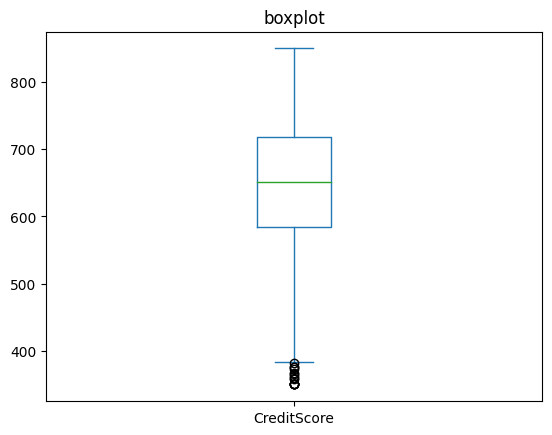

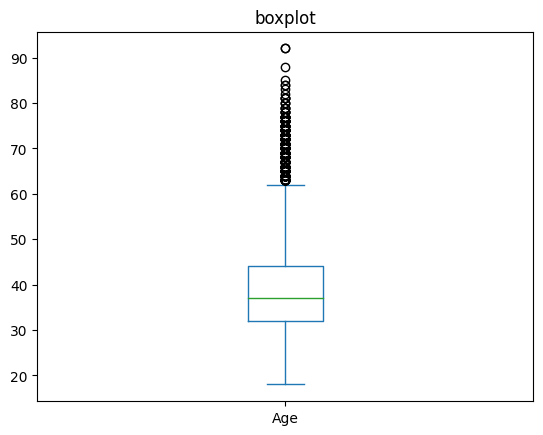

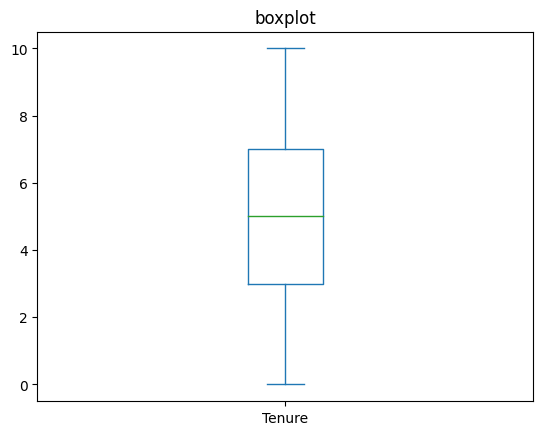

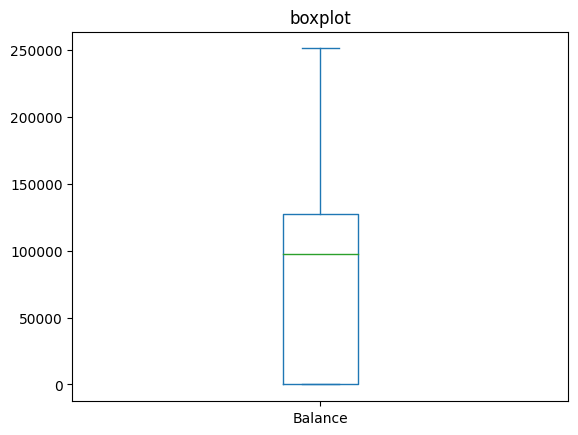

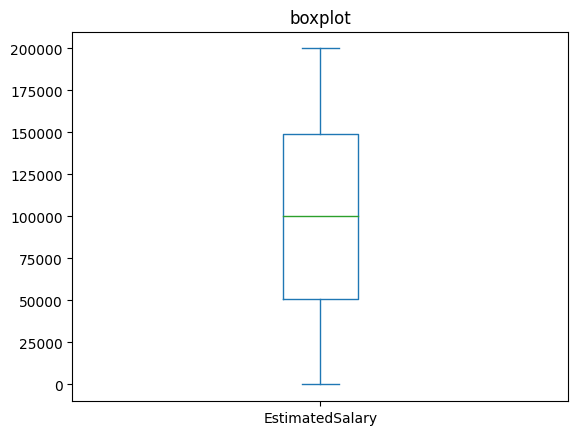

In [117]:
df = data.drop(columns=["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember","Exited"])
for cols in df:
  a = data[cols].plot(kind='box', title='boxplot')
  plt.show()

In [118]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 -(width*IQR)
upper = Q3 + (width*IQR)
data["Age"]=np.where(data["Age"]>upper,upper,np.where(data["Age"]<lower,lower,data["Age"]))

In [119]:
Q1 = data["CreditScore"].quantile(0.25)
Q3 = data["CreditScore"].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 -(width*IQR)
upper = Q3 + (width*IQR)
data["CreditScore"]=np.where(data["CreditScore"]>upper,upper,np.where(data["CreditScore"]<lower,lower,data["CreditScore"]))

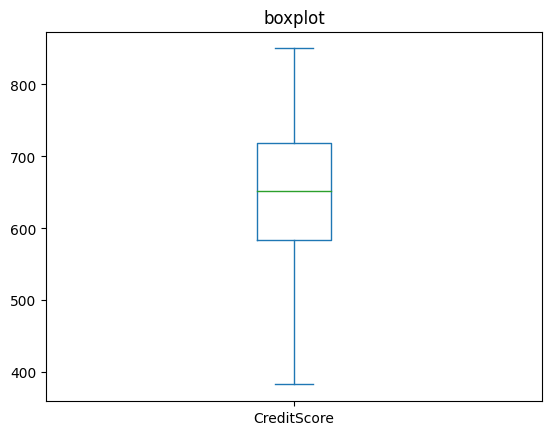

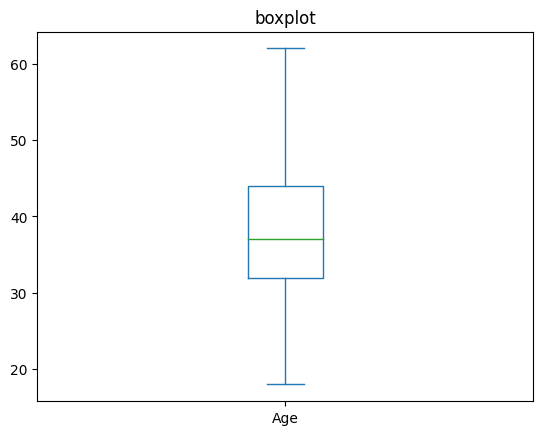

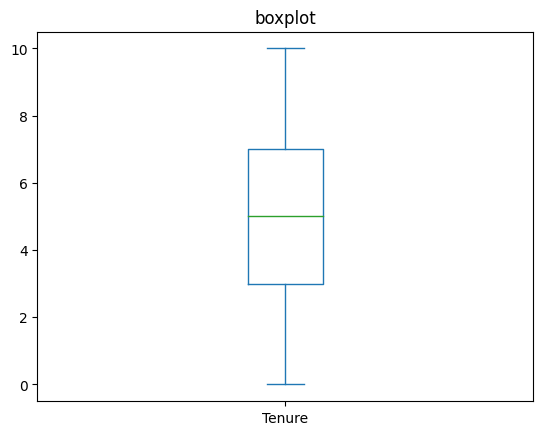

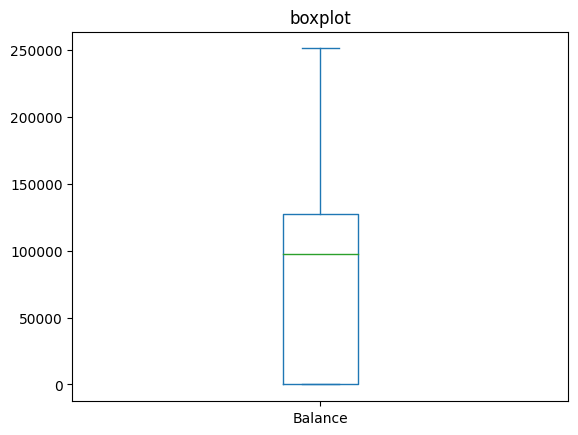

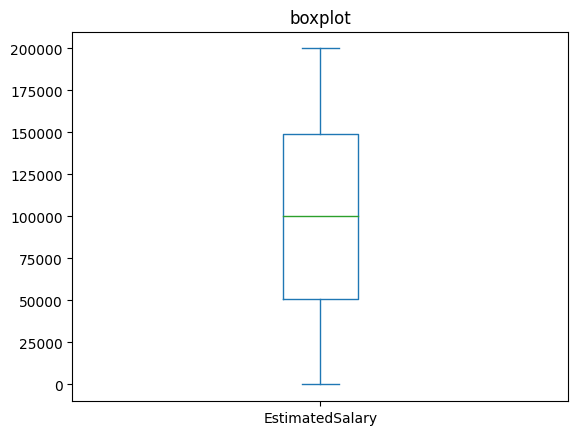

In [120]:
for cols in df:
  a = data[cols].plot(kind='box', title='boxplot')
  plt.show() #outliers have been treated

EXPLORATORY DATA ANALYSIS

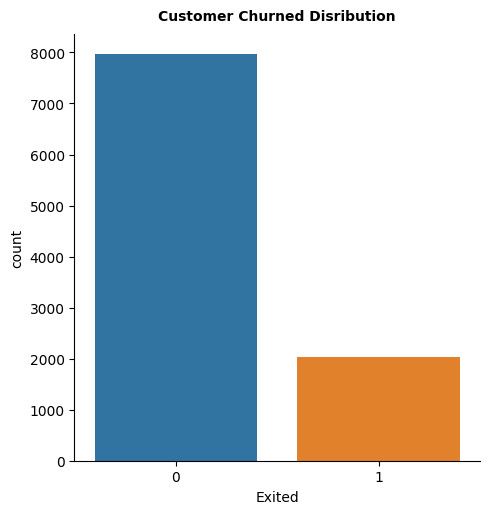

In [121]:
sns.catplot(x ="Exited",kind ="count", data=data)
plt.title("Customer Churned Disribution",fontweight="black",size=10,pad=10)
plt.show()

BINNING

In [122]:
conditions = [(data["NumOfProducts"]==1), (data["NumOfProducts"]==2), (data["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]
data["Total_Products"] = np.select(conditions,values)
data.drop(columns="NumOfProducts", inplace=True)

In [123]:
Cate = ["Adult","Senior Adult"]
age_cat = pd.cut(data['Age'], [0, 50, 70], labels=Cate)
age_cat

0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
9995    Adult
9996    Adult
9997    Adult
9998    Adult
9999    Adult
Name: Age, Length: 10000, dtype: category
Categories (2, object): ['Adult' < 'Senior Adult']

In [125]:
data["Exited"].replace({0:"No",1:"Yes"},inplace=True)

In [126]:
def countplot(column):
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x=column, data=data, hue="Exited",palette="Set2")
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

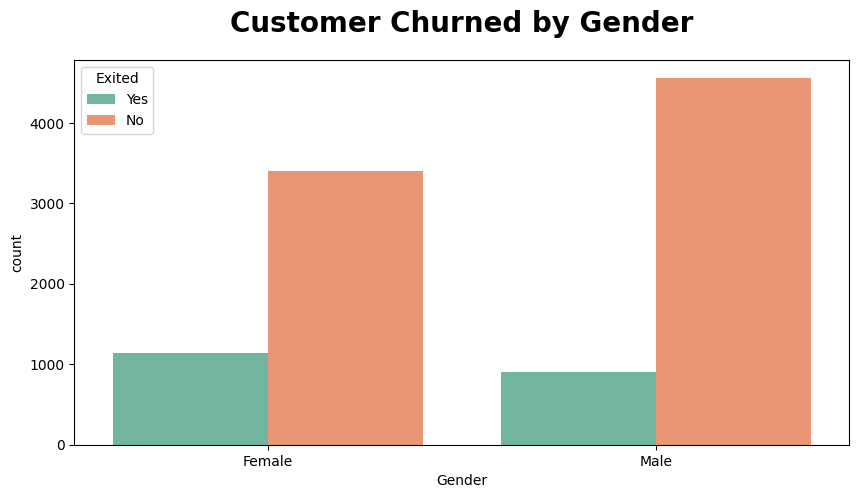

In [127]:
countplot("Gender")

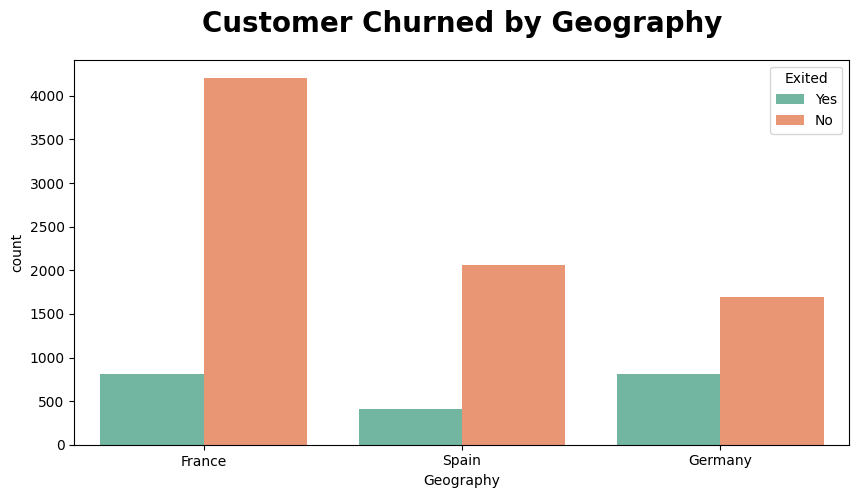

In [128]:
countplot("Geography")

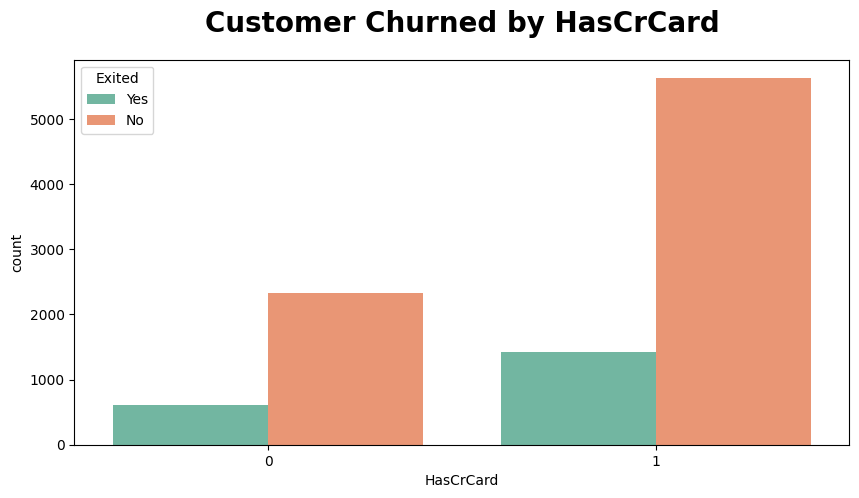

In [129]:
countplot("HasCrCard")

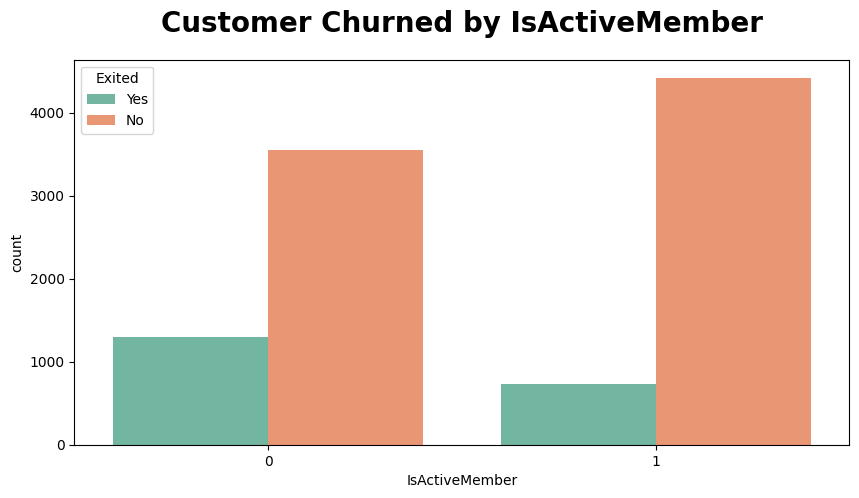

In [130]:
countplot("IsActiveMember")

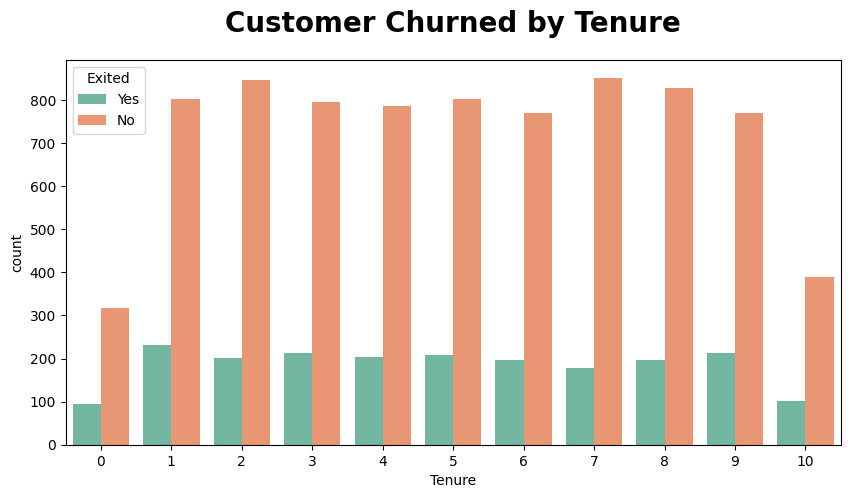

In [131]:
countplot("Tenure")

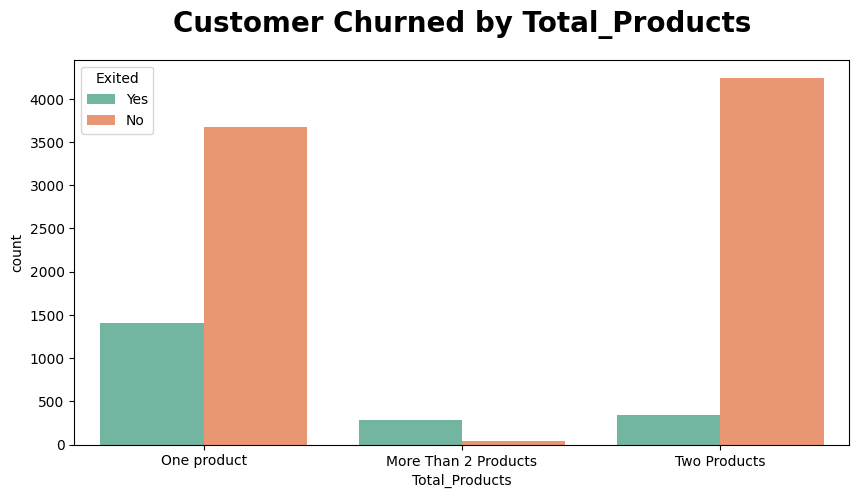

In [132]:
countplot("Total_Products")

In [134]:
def continous_plot(column):
    plt.subplot(1,2,2)
    sns.boxplot(x= data["Exited"],y = data[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

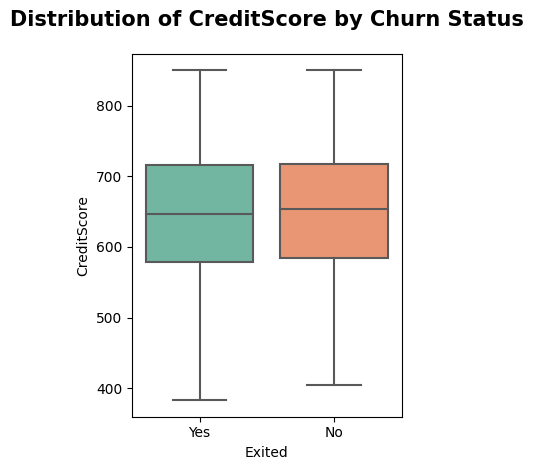

In [135]:
continous_plot("CreditScore")

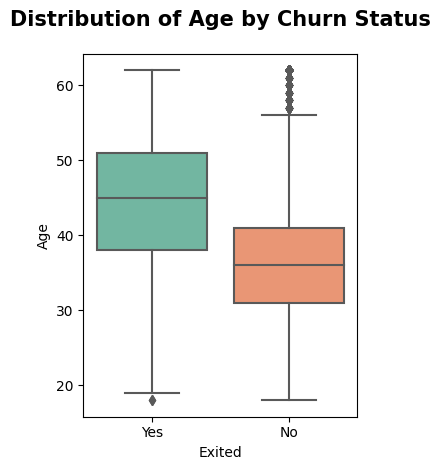

In [136]:
continous_plot("Age")

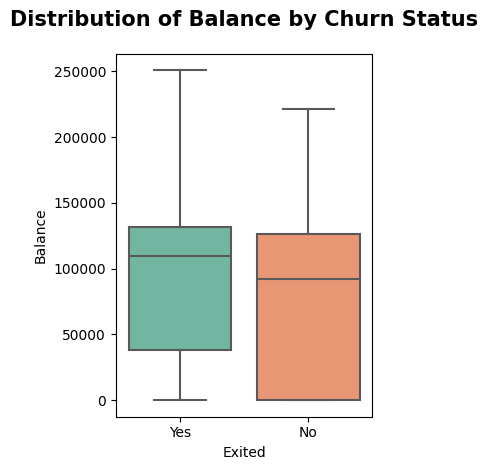

In [137]:
continous_plot("Balance")

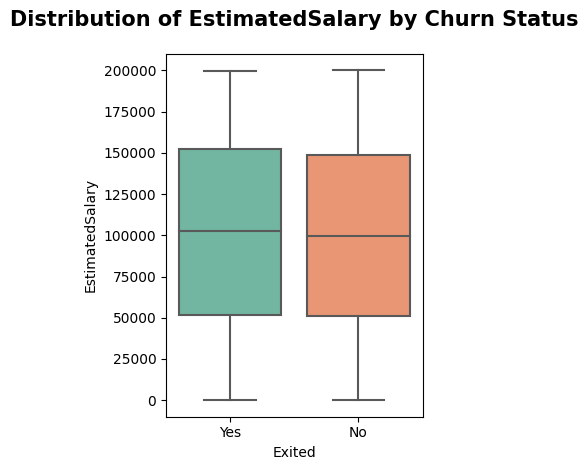

In [138]:
continous_plot("EstimatedSalary")

In [142]:
df1 = data.corr()
df1

<ipython-input-142-4277ff0e9438>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1 = data.corr()


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.007703,0.000721,0.006389,-0.005396,0.025537,-0.001150
Age,-0.007703,1.000000,-0.011163,0.033021,-0.012717,0.072455,-0.007392
Tenure,0.000721,-0.011163,1.000000,-0.012254,0.022583,-0.028362,0.007784
Balance,0.006389,0.033021,-0.012254,1.000000,-0.014858,-0.010084,0.012797
HasCrCard,-0.005396,-0.012717,0.022583,-0.014858,1.000000,-0.011866,-0.009933
IsActiveMember,0.025537,0.072455,-0.028362,-0.010084,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001150,-0.007392,0.007784,0.012797,-0.009933,-0.011421,1.000000


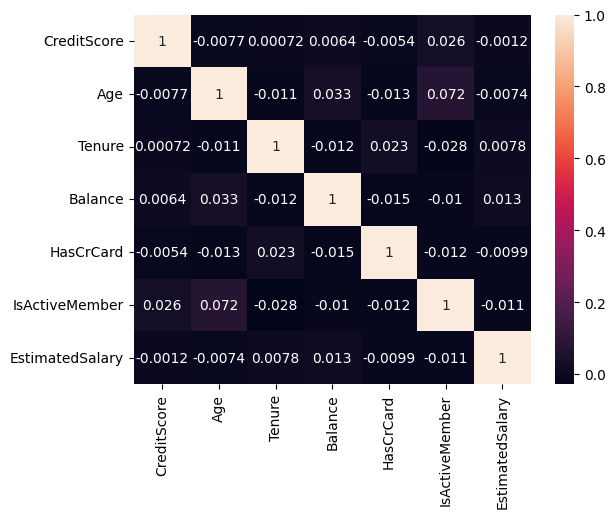

In [143]:
hm = sns.heatmap(data=df,annot=True)
plt.show()

In [144]:
for col in data.columns:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

PRINCIPAL COMPONENT ANALYSIS

Data Scaling

In [145]:
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(data)

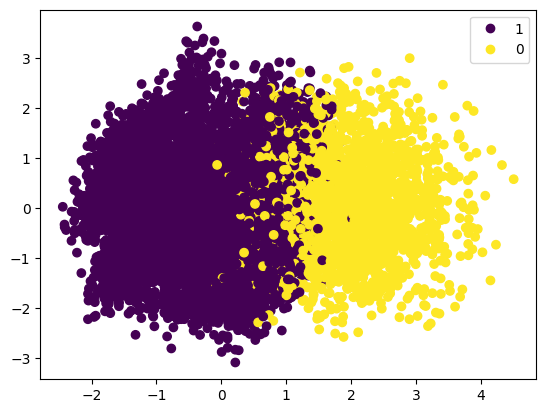

In [146]:
plot = plt.scatter(Xt[:,0], Xt[:,1], c=data["Exited"])
plt.legend(handles=plot.legend_elements()[0], labels=list(data['Exited']))
plt.show()

In [147]:
Xt

array([[ 1.41507416,  1.13152642, -1.52349704, ...,  0.23292487,
         1.21738983,  0.91087691],
       [ 0.23513402,  1.74443597,  0.13370169, ...,  0.62792037,
         0.90287587, -0.89103692],
       [ 3.6009443 , -1.97467249, -0.44761064, ...,  1.50209947,
         0.19406977, -0.04286989],
       ...,
       [ 1.10428263,  1.09282643, -1.12592769, ...,  0.97887041,
         1.56853973,  1.19162731],
       [ 0.51799196,  0.08060552, -0.77536497, ..., -2.41700728,
        -0.17472225,  1.48102965],
       [ 0.1395497 , -1.14507377,  0.21090451, ...,  0.60844565,
        -0.13529789, -0.47639408]])

In [148]:
x = data.drop(columns=["Exited"])
y = data["Exited"]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

FEATURE SELECTION

In [150]:
from sklearn.feature_selection import chi2
X=data.drop(columns=['Exited','Balance','EstimatedSalary',"Age","CreditScore"])
Y=data['Exited']

In [151]:
chi_scores=chi2(X,Y)
chi_scores

(array([1.18532506e+01, 5.15399263e+01, 3.27053797e+00, 1.50040970e-01,
        1.18199414e+02, 2.77010943e+02]),
 array([5.75607838e-04, 7.01557451e-13, 7.05344899e-02, 6.98496209e-01,
        1.56803624e-27, 3.36492723e-62]))

<Axes: >

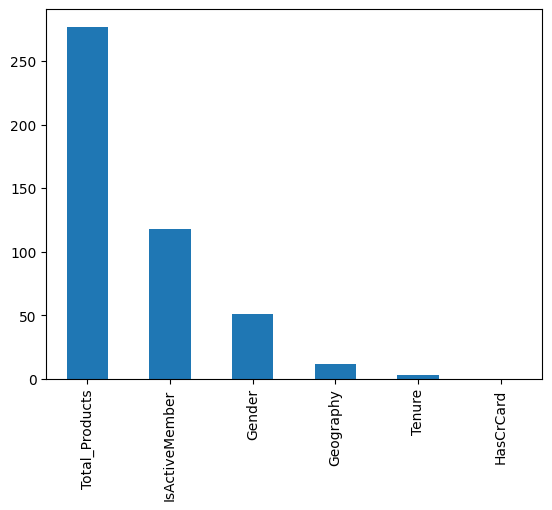

In [152]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

CLASS IMBALANCE HANDLING

In [153]:
smt = SMOTE(random_state=42)

In [154]:
x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)
print(x_train_resampled.shape ,y_train_resampled.shape)
y_train_resampled.value_counts().to_frame()

(11994, 10) (11994,)


,Exited
0,5997
1,5997


MODEL TRAINING AND PREDICTION

In [155]:
dtree = DecisionTreeClassifier()
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_resampled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [156]:
best_parameters = grid_search.best_params_
print("Best Parameters for DecisionTree Model is:\n\n")

best_parameters

Best Parameters for DecisionTree Model is:




{'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [158]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=42)

In [162]:
y_test_pred = dtree.predict(x_test)

print("Accuracy Score of Model on Testing Data  is =>",round(accuracy_score(y_test,y_test_pred)*100,2),"%")

Accuracy Score of Model on Testing Data  is => 79.08 %


In [163]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.7908
Recall Score of the Model is => 0.7908
Precision Score of the Model is => 0.7908


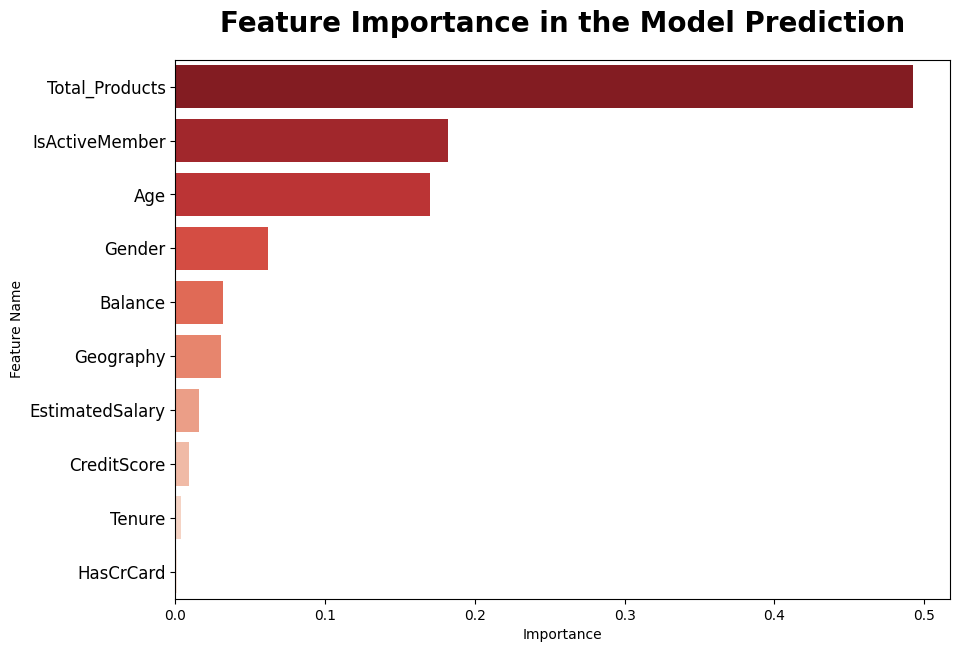

In [165]:
imp_df = pd.DataFrame({"Feature Name":x_train.columns,
                       "Importance":dtree.feature_importances_})
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="Reds_r")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

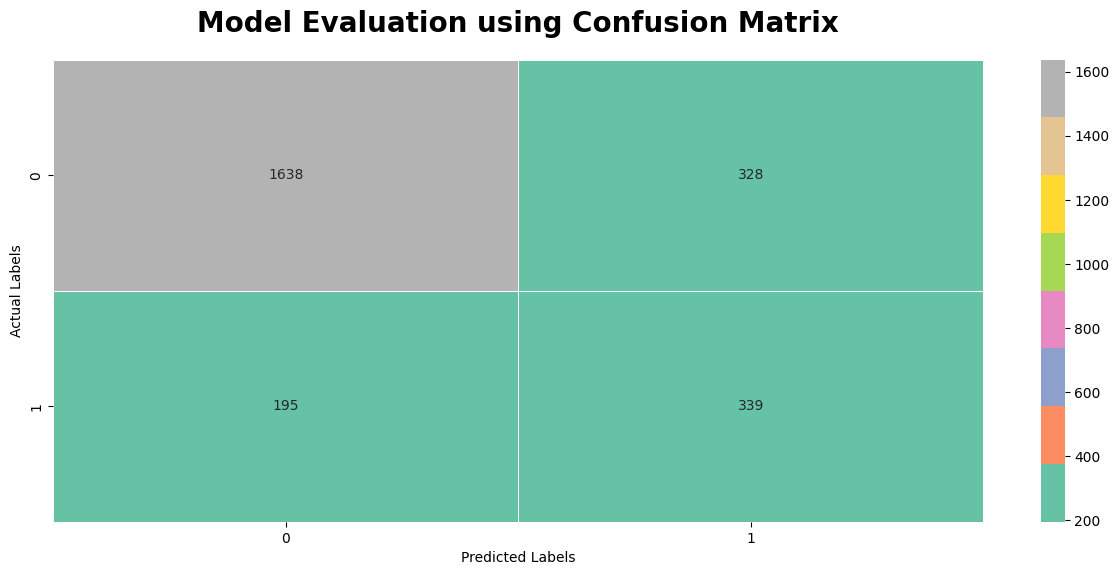

In [166]:
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set2")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()